In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [2]:
# calling biomarkers
bloodbiomk1_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\bloodbiomk1_20231117.csv"
bloodbiomk1 = pd.read_csv(bloodbiomk1_file_path)
bloodbiomk1 = pd.DataFrame(bloodbiomk1)

bloodbiomk2_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\bloodbiomk2_20231117.csv"
bloodbiomk2 = pd.read_csv(bloodbiomk2_file_path)
bloodbiomk2 = pd.DataFrame(bloodbiomk2)

csfbiomk1_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\csfbiomk1_20231117.csv"
csfbiomk1 = pd.read_csv(csfbiomk1_file_path)
csfbiomk1 = pd.DataFrame(csfbiomk1)

csfbiomk2_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\csfbiomk2_20231117.csv"
csfbiomk2 = pd.read_csv(csfbiomk2_file_path)
csfbiomk2 = pd.DataFrame(csfbiomk2)

csfbiomk3_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\csfbiomk3_20231117.csv"
csfbiomk3 = pd.read_csv(csfbiomk3_file_path)
csfbiomk3 = pd.DataFrame(csfbiomk3)


In [3]:
# Check for null values in each column
bloodbiomk1_nulls = bloodbiomk1.isnull().sum()

bloodbiomk1_nulls_df = pd.DataFrame({
    'Column': bloodbiomk1_nulls.index,
    'Number of Nulls': bloodbiomk1_nulls.values
})

bloodbiomk1_nulls_df_transposed = bloodbiomk1_nulls_df.T

print("Null values in bloodbiomk1:")
print(bloodbiomk1_nulls_df)
bloodbiomk1_nulls_df_transposed.to_csv(r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\bloodbiomk1_nulls.csv", index=False)


Null values in bloodbiomk1:
                           Column  Number of Nulls
0                      subject_id                0
1                           visit                0
2                     checkin_bin                0
3                     exposurebin                0
4                      age_decade                0
5                racecat_combined                0
6                        eduyears                0
7                      totyr_foot               56
8                     chiiseas_pf               56
9                      chiiyrs_pf               56
10                    chiiseas_pl               56
11                     chiiyrs_pl               56
12                    chiiseas_pg               56
13                     chiiyrs_pg               56
14                         p_Ab40                4
15                         p_Ab42                5
16                         p_GFAP                8
17                          p_NfL                4
18 

In [5]:
bloodbiomk1 = bloodbiomk1.drop(columns=bloodbiomk1.loc[:,'subject_id':'chiiyrs_pg'].columns)
bloodbiomk1 = bloodbiomk1.drop(columns='p_PDGFRbeta_FLAG_other')

bloodbiomk1.head()

,p_Ab40,p_Ab42,p_GFAP,p_NfL,p_Ab40_FLAG_below_ref_range,p_Ab42_FLAG_below_ref_range,p_GFAP_FLAG_below_ref_range,p_NfL_FLAG_below_ref_range,p_PDGFRbeta,p_pT181,p_pT231,p_ttau,dxcte_totaltau_plasma_flag_dv
0,126.5,8.535,73.80,11.95,0.0,0.0,0.0,0.0,5628.71,8.12,7.58,1.25,1.0
1,84.2,7.460,42.05,6.44,0.0,0.0,0.0,0.0,10123.09,6.04,7.53,1.20,1.0
2,124.0,7.285,34.35,8.22,0.0,0.0,0.0,0.0,10045.39,9.33,9.34,1.57,1.0
3,110.5,5.920,48.45,13.00,0.0,0.0,0.0,0.0,9563.19,6.63,5.87,0.73,1.0
4,126.0,9.150,46.75,11.20,0.0,0.0,0.0,0.0,12826.15,8.31,7.99,1.54,1.0


In [6]:
bloodbiomk1 = bloodbiomk1.drop(columns=['p_Ab40_FLAG_below_ref_range',
                              'p_Ab42_FLAG_below_ref_range',
                              'p_GFAP_FLAG_below_ref_range', 
                              'p_NfL_FLAG_below_ref_range',
                              'dxcte_totaltau_plasma_flag_dv'])
bloodbiomk1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   p_Ab40       232 non-null    float64
 1   p_Ab42       231 non-null    float64
 2   p_GFAP       228 non-null    float64
 3   p_NfL        232 non-null    float64
 4   p_PDGFRbeta  231 non-null    float64
 5   p_pT181      232 non-null    float64
 6   p_pT231      232 non-null    float64
 7   p_ttau       226 non-null    float64
dtypes: float64(8)
memory usage: 14.9 KB


In [9]:
bloodbiomk1.head(10)

,p_Ab40,p_Ab42,p_GFAP,p_NfL,p_PDGFRbeta,p_pT181,p_pT231,p_ttau
0,126.50,8.535,73.80,11.950,5628.71,8.12,7.58,1.25
1,84.20,7.460,42.05,6.440,10123.09,6.04,7.53,1.20
2,124.00,7.285,34.35,8.220,10045.39,9.33,9.34,1.57
3,110.50,5.920,48.45,13.000,9563.19,6.63,5.87,0.73
4,126.00,9.150,46.75,11.200,12826.15,8.31,7.99,1.54
5,42.60,3.565,20.80,50.300,4625.97,6.36,5.98,1.74
6,69.50,5.985,66.50,4.765,9019.82,5.30,5.69,1.33
7,76.85,5.465,98.10,9.330,4259.99,5.87,3.78,1.10
8,131.50,9.860,73.70,15.800,7806.22,6.47,3.74,2.14
9,85.00,7.900,21.70,7.975,6606.37,8.53,6.15,1.38


In [12]:
# Calculate the mean for each column, ignoring NaNs
mean_values = bloodbiomk1.mean()

bloodbiomk1 = bloodbiomk1.fillna(mean_values)

bloodbiomk1.head()

,p_Ab40,p_Ab42,p_GFAP,p_NfL,p_PDGFRbeta,p_pT181,p_pT231,p_ttau
0,126.5,8.535,73.80,11.95,5628.71,8.12,7.58,1.25
1,84.2,7.460,42.05,6.44,10123.09,6.04,7.53,1.20
2,124.0,7.285,34.35,8.22,10045.39,9.33,9.34,1.57
3,110.5,5.920,48.45,13.00,9563.19,6.63,5.87,0.73
4,126.0,9.150,46.75,11.20,12826.15,8.31,7.99,1.54


In [15]:
# bloodbiomk1.to_csv(r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\bloodbiomk1_edited.csv", index=True)


In [16]:
# calling Neuropsychiatric Measurements

briefa_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\briefa_20231117.csv"
briefa = pd.read_csv(briefa_file_path)
briefa = pd.DataFrame(briefa)


In [19]:
# Check for null values in each column
briefa_nulls = briefa.isnull().sum()

briefa_nulls_df = pd.DataFrame({
    'Column': briefa_nulls.index,
    'Number of Nulls': briefa_nulls.values
})

briefa_nulls_df_transposed = briefa_nulls_df.T

print("Null values in briefa:")
print(briefa_nulls_df)
briefa_nulls_df_transposed.to_csv(r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\briefa_nulls.csv", index=False)


Null values in briefa:
          Column  Number of Nulls
0     subject_id                0
1          visit                0
2    checkin_bin                0
3    exposurebin                0
4     age_decade                0
..           ...              ...
102      workorg                0
103    upseteasy                0
104    impulsive                0
105       pickup                0
106     complete                0

[107 rows x 2 columns]


In [20]:
briefa.head()

,subject_id,visit,checkin_bin,exposurebin,age_decade,racecat_combined,eduyears,totyr_foot,chiiseas_pf,chiiyrs_pf,...,activityorg,getover,onething,moodchange,consequence,workorg,upseteasy,impulsive,pickup,complete
0,1001,1,2,1,1,5,16.0,7.0,4335.4,2167.7,...,2,1,2,1,1,2,2,1,1,2
1,1002,1,2,1,1,5,15.0,14.0,10363.1,5708.1,...,3,3,3,2,3,3,3,3,2,3
2,1003,1,2,1,1,5,18.0,12.0,6685.4,4863.9,...,3,3,3,3,2,3,3,3,1,2
3,1004,1,1,1,2,5,16.0,16.0,7701.2,6448.9,...,1,1,1,1,1,1,2,1,1,1
4,1005,1,3,0,2,5,21.0,NaN,NaN,NaN,...,1,2,1,1,1,1,1,1,1,1


In [21]:
briefa = briefa.drop(columns=briefa.loc[:,'subject_id':'chiiyrs_pg'].columns)
briefa = briefa.drop(columns=briefa.loc[:,'negativ':'complete'].columns)
briefa.head()

,mi,tmi,gec,tgec,bri,tbri,inhibit,shift,emotcont,selfmon,initiate,workmem,planorg,taskmon,orgmat
0,75,64,114,57,39,46,12,9,11,7,14,17,20,13,11
1,101,85,171,85,70,79,17,15,23,15,19,24,27,15,16
2,90,77,158,79,68,77,15,14,27,12,20,22,22,14,12
3,43,40,81,42,38,46,9,8,15,6,9,8,11,7,8
4,43,39,81,41,38,45,9,11,12,6,10,8,10,7,8


In [23]:
bloodbiomk1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   p_Ab40       236 non-null    float64
 1   p_Ab42       236 non-null    float64
 2   p_GFAP       236 non-null    float64
 3   p_NfL        236 non-null    float64
 4   p_PDGFRbeta  236 non-null    float64
 5   p_pT181      236 non-null    float64
 6   p_pT231      236 non-null    float64
 7   p_ttau       236 non-null    float64
dtypes: float64(8)
memory usage: 14.9 KB


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = bloodbiomk1.copy()  # Feature matrix

models = {}
predictions = {}

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Loop through each column in briefa and train a model
for column in briefa.columns:
    y = briefa[column]  # Get the label column
    y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    models[column] = model

    y_pred = model.predict(X_test)
    predictions[column] = y_pred

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Column: {column}, Mean Squared Error: {mse}, Mean Absolute Error: {mae}, r2: {r2}")
    

Column: mi, Mean Squared Error: 385.078521284852, Mean Absolute Error: 16.62416834339369, r2: 0.0876717795854256
Column: tmi, Mean Squared Error: 273.83713926760566, Mean Absolute Error: 13.97331455399061, r2: 0.08016740005943779
Column: gec, Mean Squared Error: 1163.074518769091, Mean Absolute Error: 29.11677867203219, r2: 0.04310182562610876
Column: tgec, Mean Squared Error: 318.85318393620446, Mean Absolute Error: 15.119201877934277, r2: 0.006483445568746249
Column: bri, Mean Squared Error: 233.33944560328632, Mean Absolute Error: 13.06695774647887, r2: -0.011981149447205963
Column: tbri, Mean Squared Error: 294.3713206684952, Mean Absolute Error: 14.817386653252854, r2: -0.006619209947498428
Column: inhibit, Mean Squared Error: 14.899617154083233, Mean Absolute Error: 3.2260684104627773, r2: -0.019366603427343865
Column: shift, Mean Squared Error: 11.159496668215644, Mean Absolute Error: 2.858187122736419, r2: 0.08185045365635624
Column: emotcont, Mean Squared Error: 36.81481091535

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {}
predictions = {}

for column in briefa.columns:
    y = briefa[column]  
    X = bloodbiomk1

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)  
    X_test_scaled = scaler.transform(X_test) 
    
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    models[column] = model

    y_pred = model.predict(X_test_scaled)
    predictions[column] = y_pred

    plt.figure(figsize=(10, 6))
    plt.plot(y_test.reset_index(drop=True), label='True Values', marker='o')
    plt.plot(y_pred, label='Predicted Values', marker='x')
    plt.title(f'True vs Predicted Values for {column}')
    plt.xlabel('Sample Index')
    plt.ylabel('Values')
    plt.legend()
    plt.grid()
    
    file_name = f"{column}_true_vs_predicted.png"  
#     plt.savefig(os.path.join(save_path, file_name), bbox_inches='tight')  
    plt.show()

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Column: {column}, Mean Squared Error: {mse}, Mean Absolute Error: {mae}, R²: {r2}")


In [34]:
briefa.describe()

,mi,tmi,gec,tgec,bri,tbri,inhibit,shift,emotcont,selfmon,initiate,workmem,planorg,taskmon,orgmat
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,63.682203,56.724576,110.169492,56.508475,46.487288,55.203390,12.169492,9.690678,15.758475,8.868644,12.605932,13.758475,15.338983,9.466102,12.512712
std,19.879120,16.771696,33.473344,17.217382,14.657067,16.438698,3.606861,3.378543,5.769042,3.063115,4.101039,4.922909,5.199379,2.946855,4.335387
min,40.000000,36.000000,70.000000,35.000000,30.000000,36.000000,8.000000,6.000000,10.000000,6.000000,8.000000,8.000000,10.000000,6.000000,8.000000
25%,45.000000,41.000000,79.750000,41.000000,34.000000,41.000000,9.000000,6.000000,10.000000,6.000000,9.000000,9.000000,10.000000,6.000000,9.000000
50%,60.000000,53.000000,104.500000,54.000000,43.000000,51.000000,11.000000,9.000000,14.000000,8.000000,12.000000,13.000000,14.000000,9.000000,11.000000
75%,79.250000,68.250000,136.000000,69.000000,57.000000,67.250000,14.000000,12.000000,20.000000,11.000000,16.000000,18.000000,19.250000,12.000000,15.000000
max,116.000000,104.000000,204.000000,108.000000,88.000000,105.000000,23.000000,18.000000,30.000000,18.000000,23.000000,24.000000,29.000000,18.000000,24.000000


In [26]:
# Create a DataFrame to store predictions
predicted_values = pd.DataFrame(index=briefa.index)

for column, model in models.items():
    predicted_values[column] = model.predict(X_scaled)

print(predicted_values.head())


        mi        tmi      gec    tgec        bri       tbri    inhibit  \
0  63.1900  55.966667  101.340  51.275  37.740000  45.350000  10.940000   
1  81.1500  69.530000  137.930  67.460  58.260000  66.293333  14.540000   
2  80.3225  70.710000  141.810  70.800  60.433333  68.860833  13.999000   
3  51.3200  48.896000   95.560  50.310  42.700000  52.150000  10.480000   
4  52.2200  45.650000   93.646  47.250  41.462000  48.330000   9.883333   

       shift   emotcont    selfmon   initiate    workmem    planorg  taskmon  \
0   8.140833  11.403333   6.800000  12.330000  14.160000  16.320000  10.5925   
1  12.430000  19.040000  11.970000  16.020000  19.064000  21.200000  12.1400   
2  12.480000  23.010000  10.418190  17.420000  19.402500  19.060000  12.2200   
3   9.200000  15.760000   7.109000  10.160000  10.880000  12.930000   8.1445   
4  10.742500  12.780000   6.773333  11.643333  10.120833  11.933333   8.1350   

   orgmat  
0  10.750  
1  13.720  
2  11.800  
3  10.050  
4   9.19

C:\Users\fargor\AppData\Local\Temp\ipykernel_22140\2804606642.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(briefa['mi'])


<Axes: xlabel='mi', ylabel='Density'>

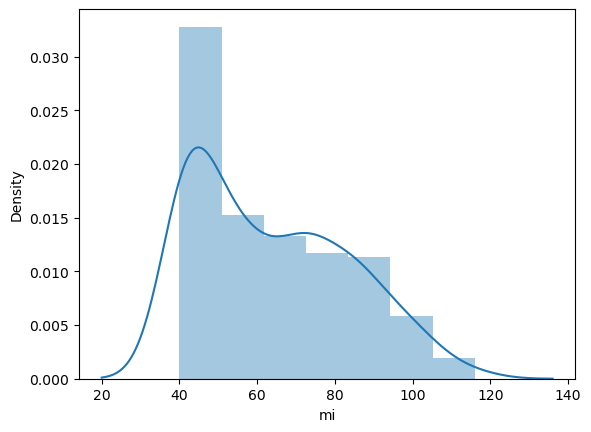

In [39]:
sns.distplot(briefa['mi'])

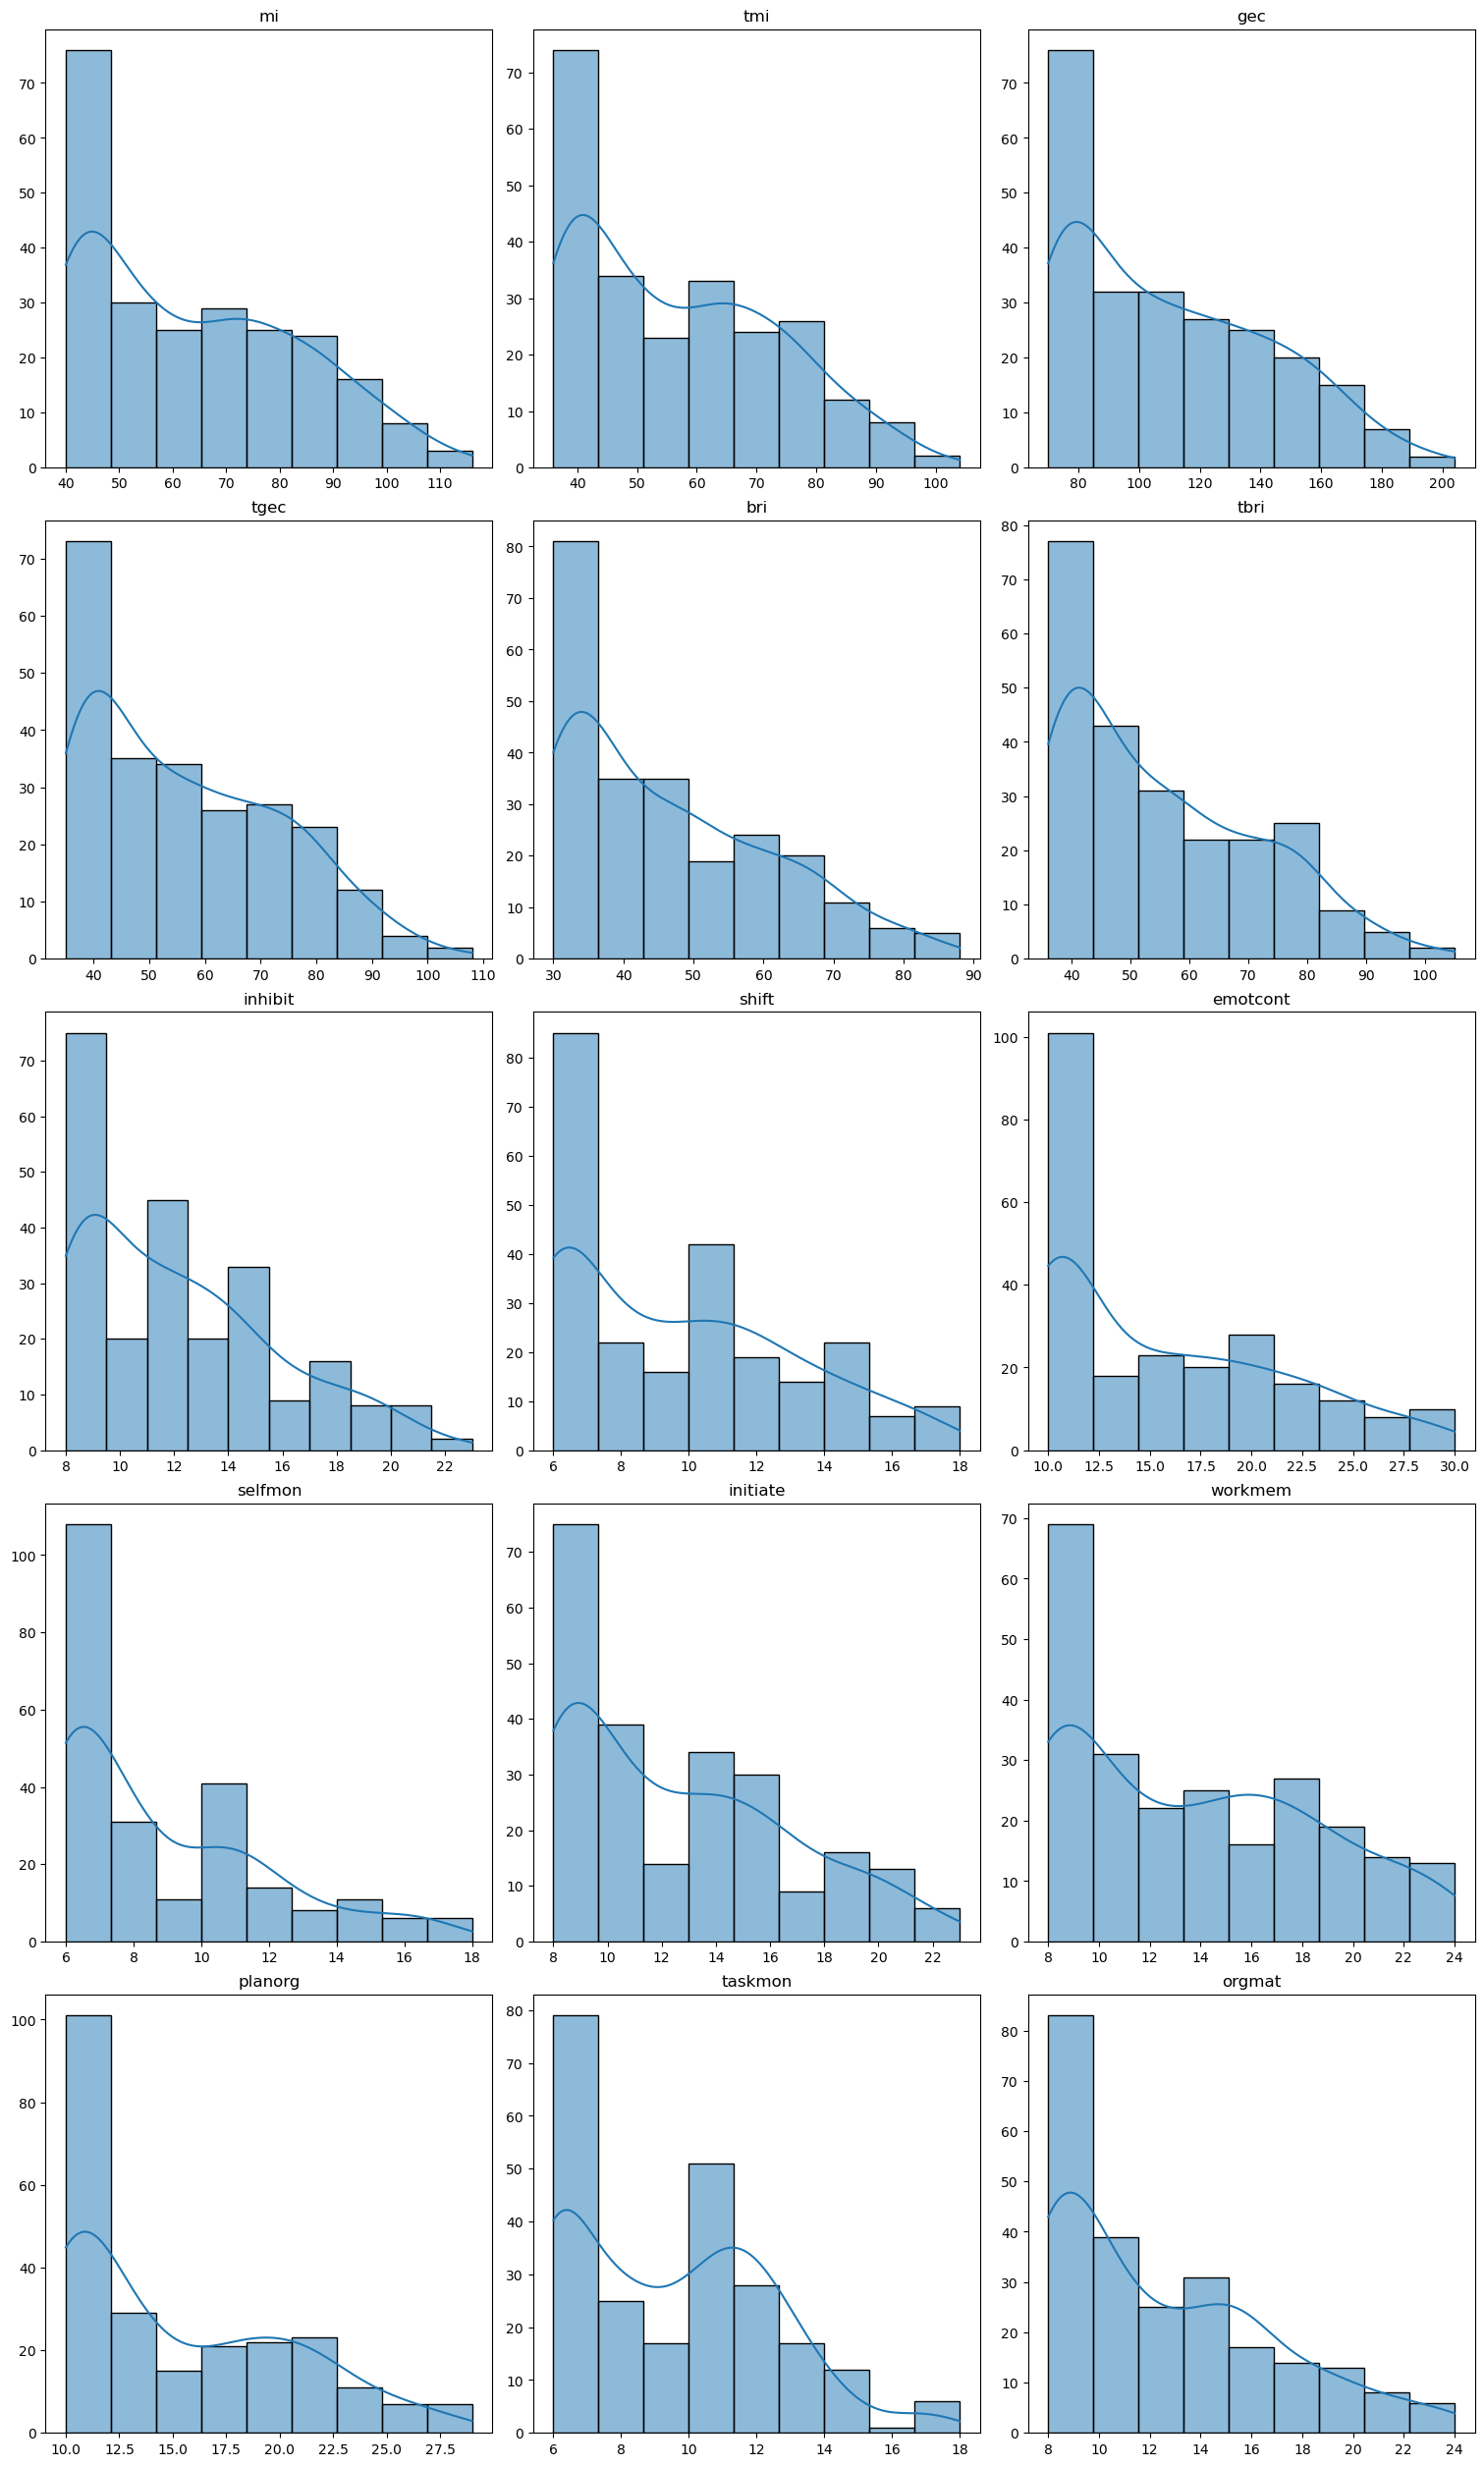

In [42]:
# Create a list of column names (labels) in the briefa DataFrame
labels = briefa.columns

num_labels = len(labels)
num_cols = 3  
num_rows = (num_labels + num_cols - 1) // num_cols  # Compute number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)

axes = axes.flatten()

for i, label in enumerate(labels):
    sns.histplot(briefa[label], ax=axes[i], kde=True)  # Using histplot with KDE for a distribution plot
    axes[i].set_title(label)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused subplots
for j in range(num_labels, len(axes)):
    axes[j].axis('off')

plt.show()

In [43]:
briefa.head()

,mi,tmi,gec,tgec,bri,tbri,inhibit,shift,emotcont,selfmon,initiate,workmem,planorg,taskmon,orgmat
0,75,64,114,57,39,46,12,9,11,7,14,17,20,13,11
1,101,85,171,85,70,79,17,15,23,15,19,24,27,15,16
2,90,77,158,79,68,77,15,14,27,12,20,22,22,14,12
3,43,40,81,42,38,46,9,8,15,6,9,8,11,7,8
4,43,39,81,41,38,45,9,11,12,6,10,8,10,7,8


In [54]:
categories_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\categories.csv"
categories_df = pd.read_csv(categories_file_path)
new_column = categories_df['checkin_bin']
briefa['category'] = new_column
print(briefa.head())

    mi  tmi  gec  tgec  bri  tbri  inhibit  shift  emotcont  selfmon  \
0   75   64  114    57   39    46       12      9        11        7   
1  101   85  171    85   70    79       17     15        23       15   
2   90   77  158    79   68    77       15     14        27       12   
3   43   40   81    42   38    46        9      8        15        6   
4   43   39   81    41   38    45        9     11        12        6   

   initiate  workmem  planorg  taskmon  orgmat  category  
0        14       17       20       13      11         2  
1        19       24       27       15      16         2  
2        20       22       22       14      12         2  
3         9        8       11        7       8         1  
4        10        8       10        7       8         3  


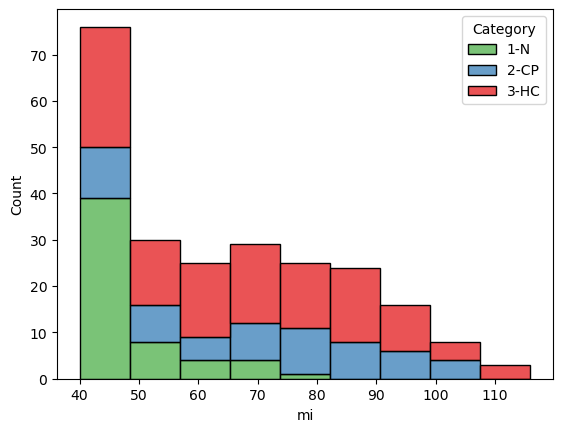

In [68]:
sns.histplot(data=briefa, x='mi', hue='category', multiple='stack', palette='Set1')
plt.legend(title='Category', labels=['1-N', '2-CP', '3-HC'])
plt.show()

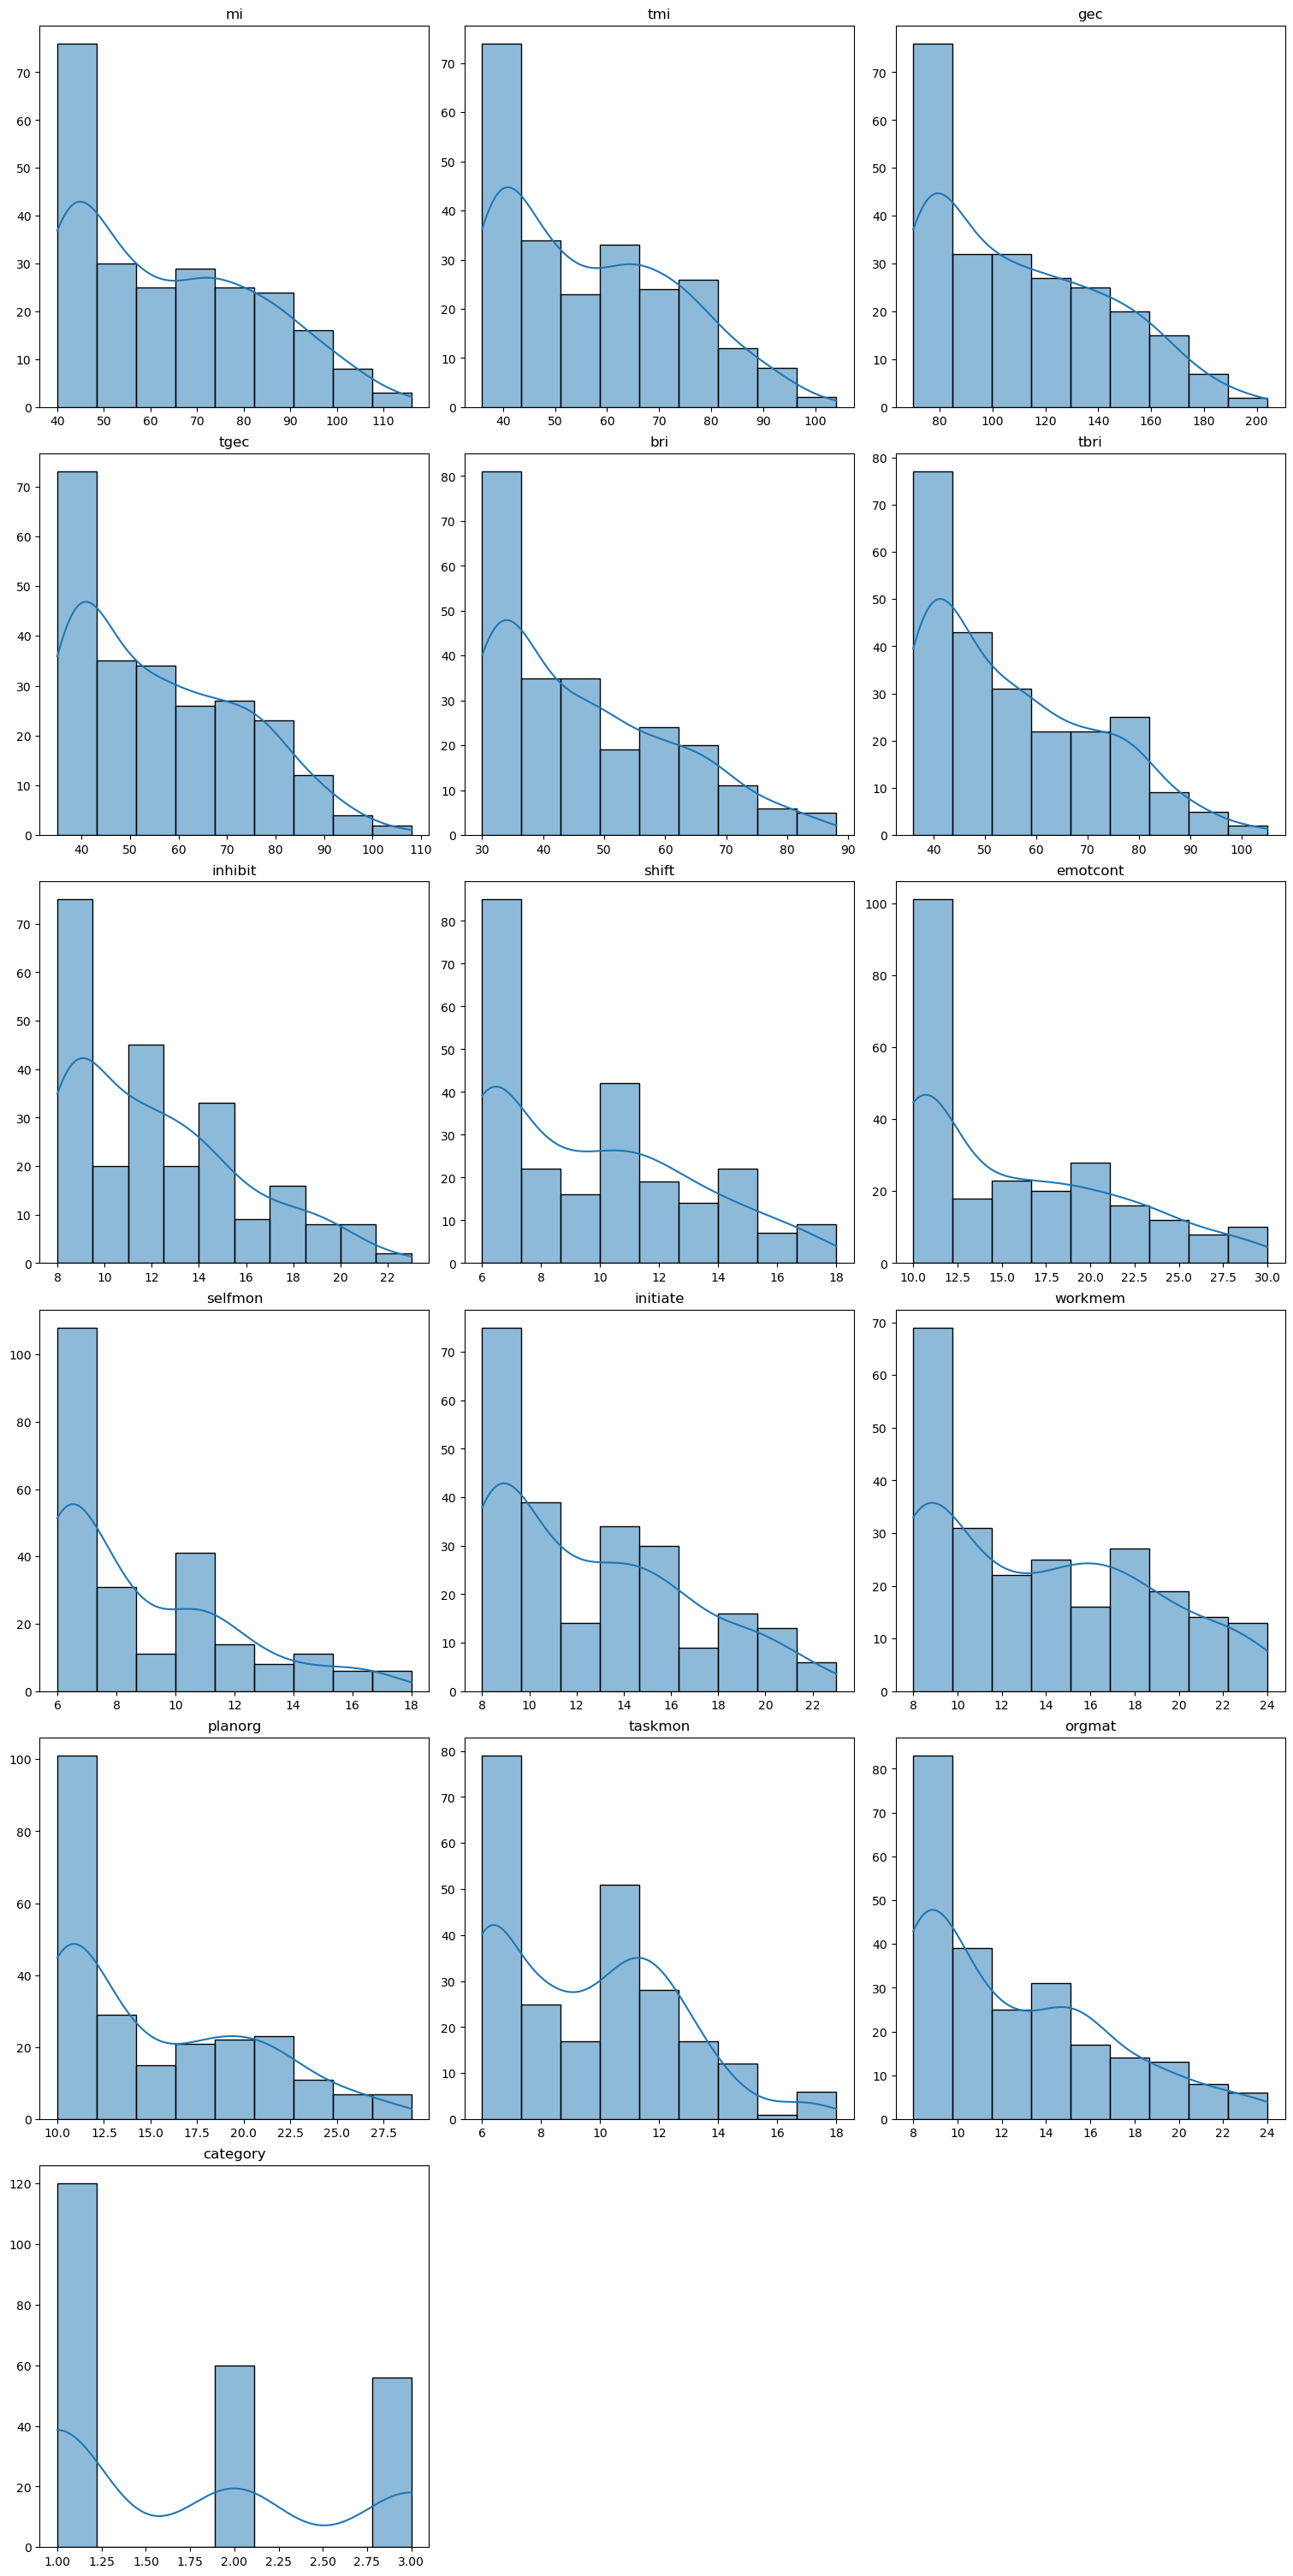

In [69]:
# Create a list of column names (labels) in the briefa DataFrame
labels = briefa.columns

num_labels = len(labels)
num_cols = 3  
num_rows = (num_labels + num_cols - 1) // num_cols  # Compute number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)

axes = axes.flatten()

for i, label in enumerate(labels):
    sns.histplot(briefa[label], ax=axes[i], kde=True)  # Using histplot with KDE for a distribution plot
    axes[i].set_title(label)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused subplots
for j in range(num_labels, len(axes)):
    axes[j].axis('off')

plt.show()

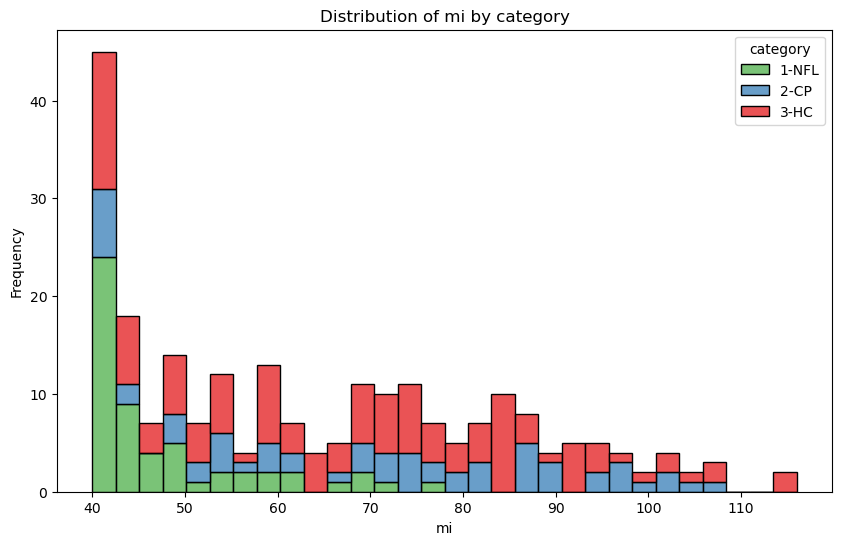

TypeError: Figure.savefig() missing 1 required positional argument: 'fname'

<Figure size 640x480 with 0 Axes>

In [70]:
category_col = 'category'

for column in briefa.columns:
    if column != category_col:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=briefa, x=column, hue=category_col, palette='Set1', multiple='stack', bins=30)
        plt.legend(title=category_col, labels=['1-NFL', '2-CP', '3-HC'])
        plt.title(f'Distribution of {column} by {category_col}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  
        plt.savefig()
        


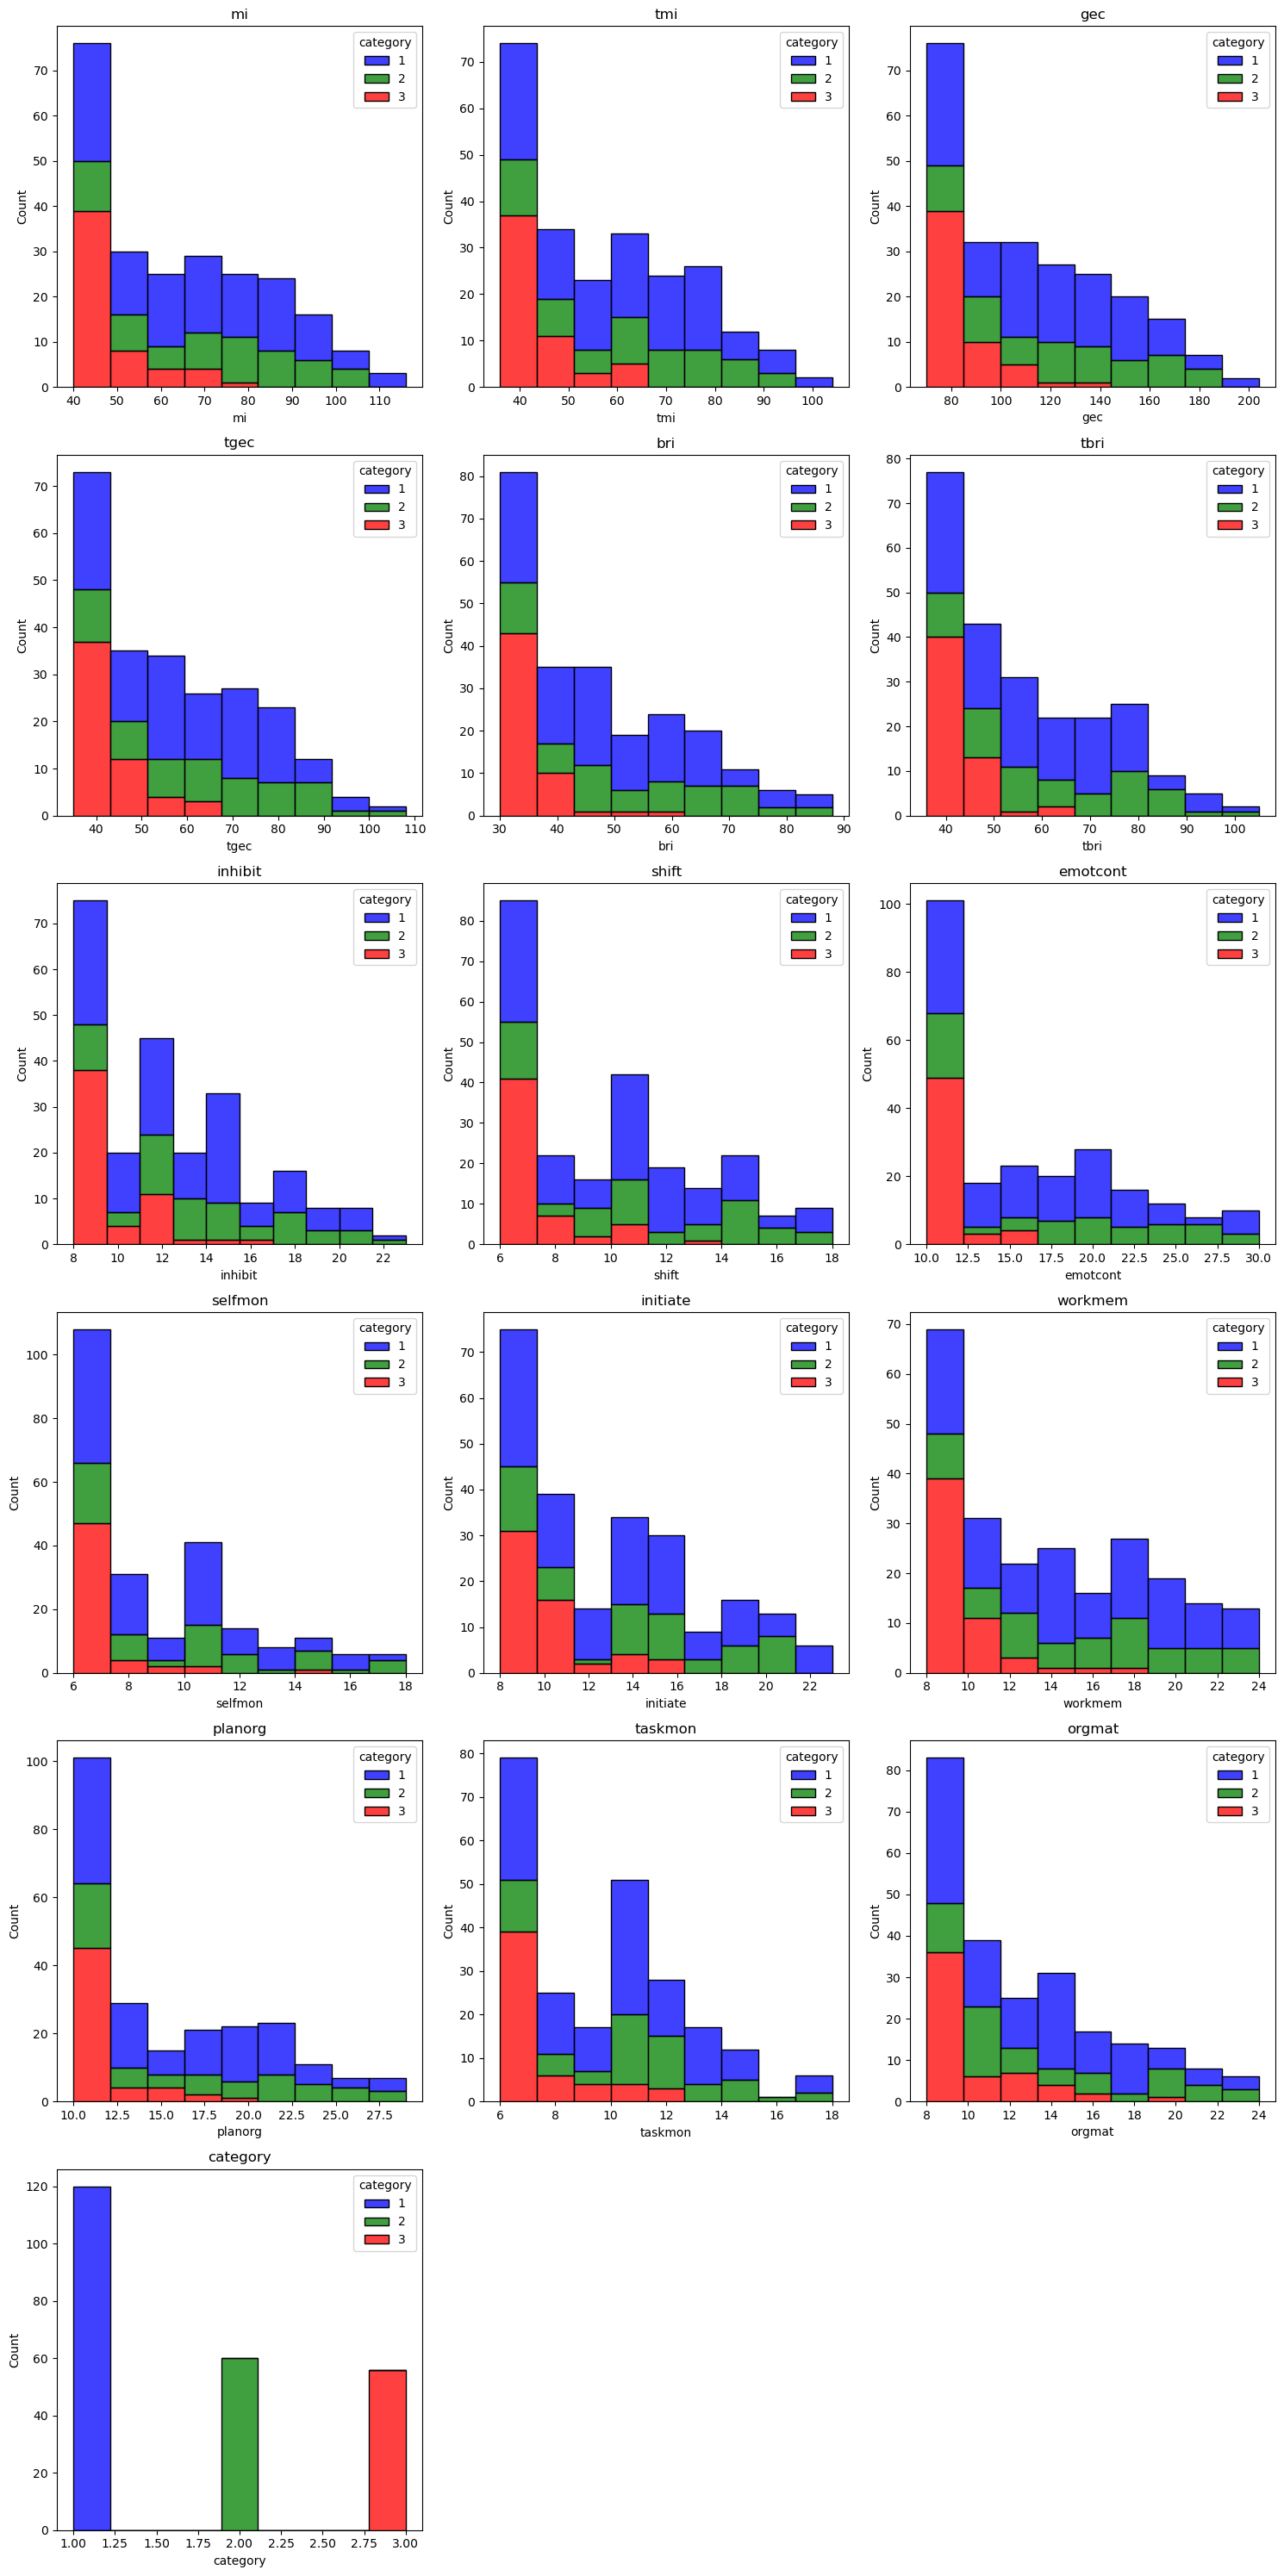

In [71]:
columns_to_plot = briefa.columns

num_columns = 3
num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
axes = axes.flatten() 

for i, column in enumerate(columns_to_plot):
    sns.histplot(data=briefa, x=column, hue='category', palette={1: 'blue', 2: 'green', 3: 'red'},
                 multiple='stack', ax=axes[i])
    axes[i].set_title(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
plt.savefig ('Accuracy_Loss_tum.vs.notum_rs64.png', bbox_inches='tight')